<a href="https://colab.research.google.com/github/khairuldzulqarnain/machine_learning/blob/main/sentimen_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Dataset**





In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [6]:
df = pd.read_csv("/content/sample_data/TWSentiment.csv", sep=";")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15912 entries, 0 to 15911
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   username        15912 non-null  object 
 1   date            15907 non-null  object 
 2   time            15907 non-null  object 
 3   replies_count   15907 non-null  float64
 4   retweets_count  15911 non-null  float64
 5   likes_count     15911 non-null  float64
 6   steaming data   15912 non-null  object 
 7   Compound_Score  15908 non-null  float64
 8   Sentiments      15912 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


In [8]:
df.head()

,username,date,time,replies_count,retweets_count,likes_count,steaming data,Compound_Score,Sentiments
0,tvonenews,30/08/2022,10:02:37,2964.0,4058.0,19127.0,strong shock maruf conduct sexual intercourse ...,-3818.0,Negatif
1,idextratime,15/02/2023,12:38:10,2715.0,4492.0,37295.0,recap of verdicts suspected of brigadier j fer...,-6369.0,Negatif
2,detikcom,21/09/2022,14:27:25,2360.0,1193.0,5082.0,National Police call AKBP Arif Rahman key witn...,-5574.0,Negatif
3,burhanmuhtadi,30/08/2022,20:20:23,1569.0,11600.0,35064.0,confiscation of evidence of corruption in the ...,-5994.0,Negatif
4,ask rl,22/02/2023,18:40:03,1527.0,271.0,7793.0,Tanyral Bharad is pollary guys wa dya t,0.0,Netral


In [9]:
df['Sentiments'] = df['Sentiments'].replace('Negatif', 'Negative')
df['Sentiments'] = df['Sentiments'].replace('Positif', 'Positive')
df['Sentiments'] = df['Sentiments'].replace('Netral', 'Neutral')

In [10]:
df.head()

,username,date,time,replies_count,retweets_count,likes_count,steaming data,Compound_Score,Sentiments
0,tvonenews,30/08/2022,10:02:37,2964.0,4058.0,19127.0,strong shock maruf conduct sexual intercourse ...,-3818.0,Negative
1,idextratime,15/02/2023,12:38:10,2715.0,4492.0,37295.0,recap of verdicts suspected of brigadier j fer...,-6369.0,Negative
2,detikcom,21/09/2022,14:27:25,2360.0,1193.0,5082.0,National Police call AKBP Arif Rahman key witn...,-5574.0,Negative
3,burhanmuhtadi,30/08/2022,20:20:23,1569.0,11600.0,35064.0,confiscation of evidence of corruption in the ...,-5994.0,Negative
4,ask rl,22/02/2023,18:40:03,1527.0,271.0,7793.0,Tanyral Bharad is pollary guys wa dya t,0.0,Neutral


In [11]:
df.describe()

,replies_count,retweets_count,likes_count,Compound_Score
count,15907.000000,15911.000000,15911.000000,15908.000000
mean,7.628780,13.925775,65.883791,-1016.634775
std,54.868947,159.337774,714.403542,4713.857790
min,1.000000,0.000000,0.000000,-9895.000000
25%,1.000000,0.000000,0.000000,-5267.000000
50%,1.000000,0.000000,2.000000,0.000000
75%,2.000000,3.000000,13.000000,1027.000000
max,2964.000000,11600.000000,42027.000000,9737.000000


# **Exploration Data Analysis**

## **Hot news about Malaysia**

In [12]:
contains_malaysia =df["steaming data"].str.contains('Malaysia', case=False, na=False)

new_malaysia = df[contains_malaysia]

print(new_malaysia)

              username        date      time  replies_count  retweets_count  \
9023         good_on_g  13/07/2022  21:56:24            1.0             0.0   
9642   the_agastyfa_94  21/11/2022  13:38:45            1.0             0.0   
9646   the_agastyfa_94  21/11/2022  08:56:01            1.0             0.0   
11799            blood  28/12/2022  17:11:58            1.0             0.0   
15864   hockeymalaysia  12/08/2022  13:09:32            1.0             0.0   

       likes_count                                      steaming data  \
9023           0.0  male female buya yahya ms glow nguyen squidgam...   
9642           0.0  Beritartm rtmmalaysia hangs the Malaysian parl...   
9646           0.0  Malaysian parliament hanged Friday elect PM Se...   
11799          0.0  suriyamaara aravosambo selenofyl chandersbc ma...   
15864          3.0  womens indoor asia cup bangkok thailand pool b...   

       Compound_Score Sentiments  
9023           4588.0   Positive  
9642          -1

In [13]:
row_9642 = df.loc[9642, 'steaming data']
row_9646 = df.loc[9646, 'steaming data']

print(f'Election New: {row_9642}')
print(f'Election New: {row_9646}')

Election New: Beritartm rtmmalaysia hangs the Malaysian parliament, it's a bad stop, right? Itaewon x itaewon, or Brigadier J, like Friday, the hanging session of the Malaysian parliament, like Brigadier J
Election New: Malaysian parliament hanged Friday elect PM Sembah Raja Malaysia hangs Malaysian parliament briefly trial Brigadier J


## **Duration the data was Scrapped**

In [14]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 'coerce' will handle any non-convertible values as NaT

# Calculate the earliest and latest dates
earliest_date = df['date'].min()
latest_date = df['date'].max()

duration = latest_date - earliest_date

# Print results
print(f"The earliest date is: {earliest_date}")
print(f"The latest date is: {latest_date}")
print(f"The duration between the earliest and latest dates is: {duration}")

The earliest date is: 2022-07-02 00:00:00
The latest date is: 2023-03-13 00:00:00
The duration between the earliest and latest dates is: 254 days 00:00:00


<ipython-input-14-6e0b644e5fe9>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 'coerce' will handle any non-convertible values as NaT


## **Visualised data**

In [15]:
df.columns

Index(['username', 'date', 'time', 'replies_count', 'retweets_count',
       'likes_count', 'steaming data', 'Compound_Score', 'Sentiments'],
      dtype='object')

<Axes: xlabel='Compound_Score', ylabel='Count'>

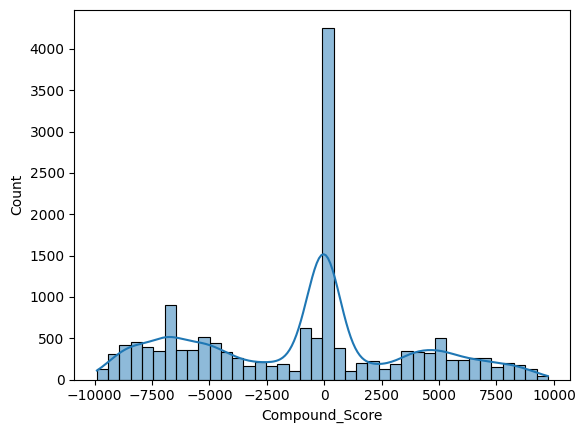

In [16]:
sns.histplot(df['Compound_Score'], kde=True)

<Axes: xlabel='Sentiments', ylabel='Count'>

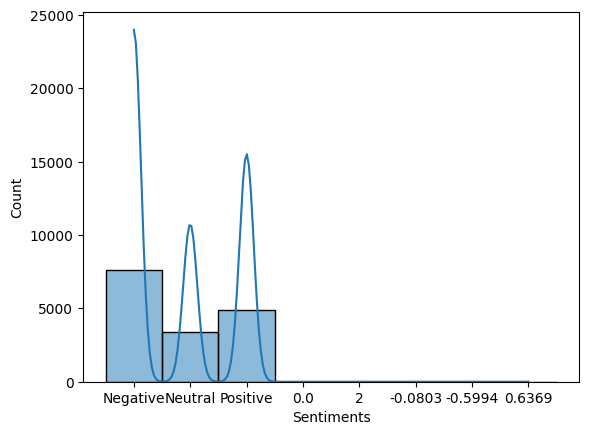

In [17]:
sns.histplot(df['Sentiments'], kde=True)

## **Correlation on sentiment**

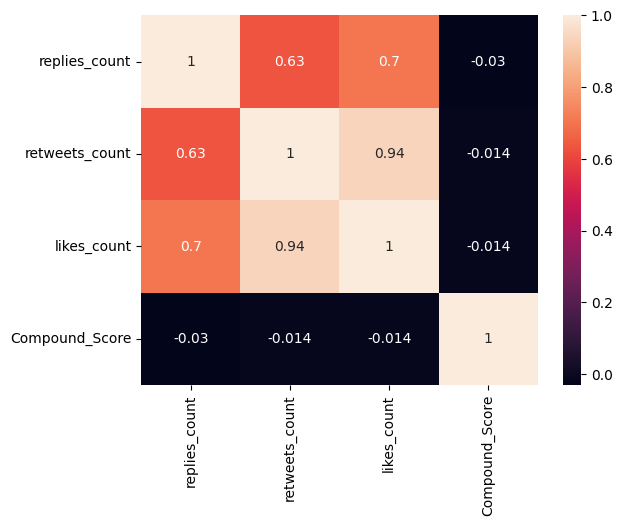

In [18]:
correlation_metric =  df.corr
sns.heatmap(df[['replies_count', 'retweets_count',
       'likes_count','Compound_Score']].corr(), annot=True)
plt.show()

## **Data cleaning (Drop all NULL values)**

In [19]:
df_cleaned = df.dropna()


In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15907 entries, 0 to 15911
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   username        15907 non-null  object        
 1   date            15907 non-null  datetime64[ns]
 2   time            15907 non-null  object        
 3   replies_count   15907 non-null  float64       
 4   retweets_count  15907 non-null  float64       
 5   likes_count     15907 non-null  float64       
 6   steaming data   15907 non-null  object        
 7   Compound_Score  15907 non-null  float64       
 8   Sentiments      15907 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.2+ MB


## **Barchart after cleaned Null Value**

<Axes: xlabel='Sentiments', ylabel='Count'>

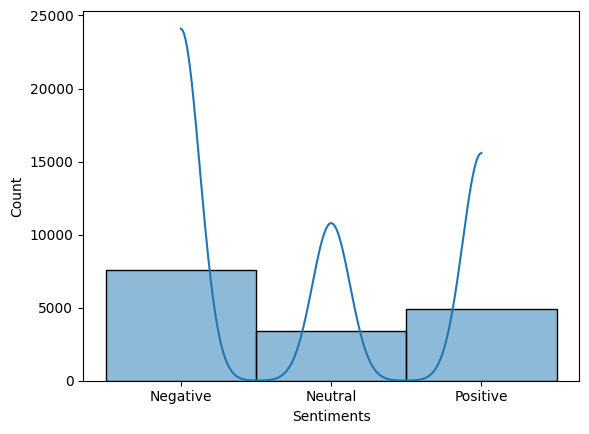

In [21]:
sns.histplot(df_cleaned['Sentiments'], kde=True)

## **Value counts for each sentiment**

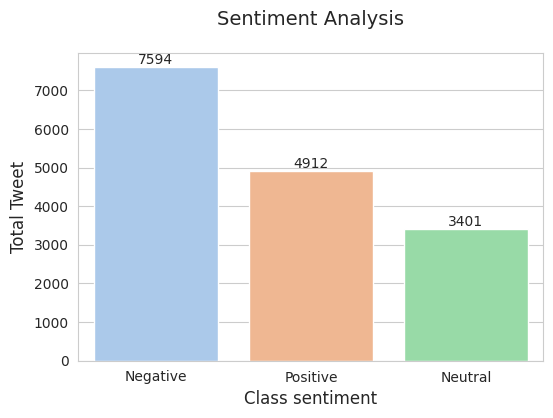

In [22]:
sentiment_count = df_cleaned['Sentiments'].value_counts()

sns.set_style('whitegrid')

# Create a bar plot with the sentiment count data
fig, ax = plt.subplots(figsize = (6,4))

# Assign the x variable to hue and set legend to False
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel', hue=sentiment_count.index, dodge=False, legend=False)

plt.title('Sentiment Analysis' , fontsize=14 , pad = 20)
plt.xlabel('Class sentiment', fontsize=12)
plt.ylabel('Total Tweet', fontsize=12)

# Add text labels on top of the bars
for i, count in enumerate(sentiment_count.values):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

# **Algorithm Naive Bayer Classifier Multinomial**

In [23]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




## **Split and test dataset**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['steaming data'], df_cleaned['Sentiments'], test_size=0.2, random_state=42)

## **Total train and test data**

In [25]:
print(f' Total train data : {len(X_train)}')
print(f' Total test data : {len(X_test)}')

 Total train data : 12725
 Total test data : 3182


## **Change Text to Vector Feature**

> Add blockquote



In [26]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## **Print Extraction Feature**

In [27]:
print('Extraction Feature:')
print('----------------------------')
print('Vector feature Train data:')
print(X_train_vectorized.toarray())
print('\nVector feature Test data:')
print(X_test_vectorized.toarray())


Extraction Feature:
----------------------------
Vector feature Train data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Vector feature Test data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **Train Model Naive Bayes Using Multinomial**

In [28]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

## **Evaluate Model Using Test Data**

In [29]:
predictions =  model.predict(X_test_vectorized)

accuracy= accuracy_score(y_test, predictions)
print(f' Accuracy: {accuracy:.2f}')

print('\nClassification Report: \n', classification_report(y_test, predictions))




 Accuracy: 0.65

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.64      0.87      0.74      1553
     Neutral       0.78      0.26      0.39       646
    Positive       0.65      0.56      0.60       983

    accuracy                           0.65      3182
   macro avg       0.69      0.57      0.58      3182
weighted avg       0.67      0.65      0.63      3182



# **Confussion Matrix Naive Bayes test model**

In [30]:
print('\nConfussion Matrix:\n', confusion_matrix(y_test, predictions))


Confussion Matrix:
 [[1358   24  171]
 [ 347  170  129]
 [ 407   24  552]]


## **Create Plot Confussion Matrix test model**

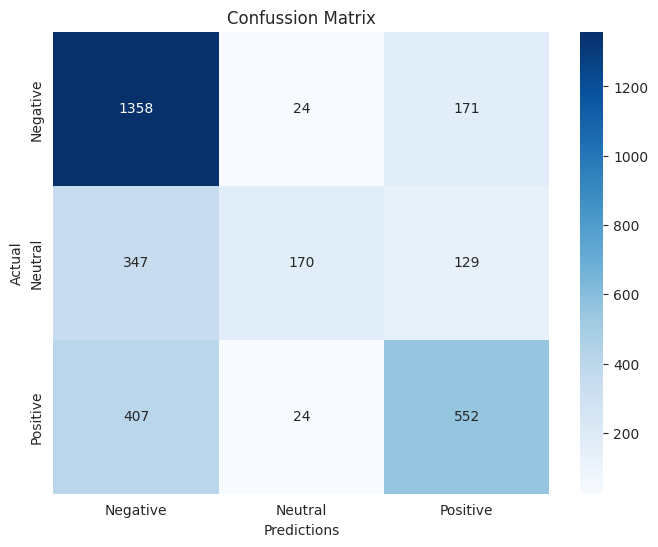

In [31]:
conf_matrix = confusion_matrix(y_test, predictions)

# plot confussion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'] )
plt.title('Confussion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

*Evaluate Model using Test data was not reconmended as it will overfitting the model. Overfitting happened because it 'Memorize' the Test data and can not generated good new data. It is reconmended to used train data rather than test data.*

# **Confussion Matrix Naive Bayes train model**

In [32]:
predictions_train =  model.predict(X_train_vectorized)

accuracy_train= accuracy_score(y_train, predictions_train)
print(f' Accuracy on Training Data: {accuracy_train:.2f}')

print('\nClassification Report on Training data: \n', classification_report(y_train, predictions_train))

 Accuracy on Training Data: 0.80

Classification Report on Training data: 
               precision    recall  f1-score   support

    Negative       0.75      0.94      0.83      6041
     Neutral       0.93      0.59      0.72      2755
    Positive       0.83      0.73      0.78      3929

    accuracy                           0.80     12725
   macro avg       0.84      0.75      0.78     12725
weighted avg       0.81      0.80      0.79     12725



## **Create Plot Confussion Matrix Naive Bayer train model**

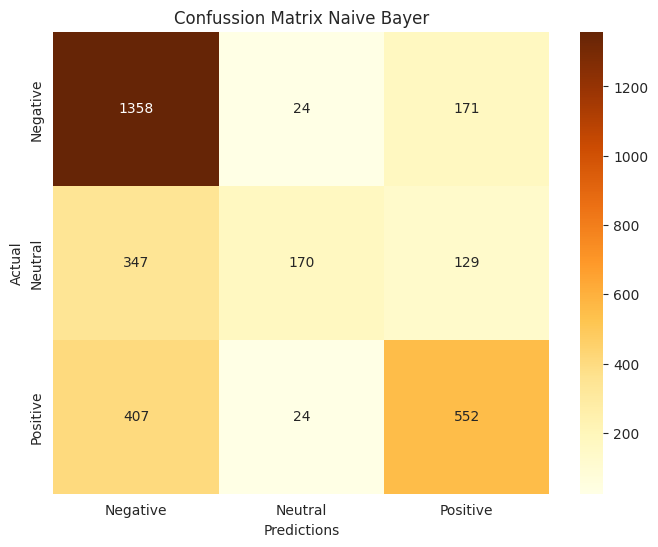

In [33]:
conf_matrix_train = confusion_matrix(y_train, predictions_train)

# plot confussion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'] )
plt.title('Confussion Matrix Naive Bayer')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

# **Algorithm Support Ventor Machine (SVM)**

In [34]:
# import Library
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['steaming data'], df_cleaned['Sentiments'], test_size=0.3, random_state=42)

In [36]:
print(f' Total train data; {len(X_train)}')
print(f' Total test data; {len(X_test)}')

 Total train data; 11134
 Total test data; 4773


## **Transform text data into vector TF-IDF**

In [37]:
tfidf_Vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_Vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_Vectorizer.transform(X_test)

In [38]:
features_names = tfidf_Vectorizer.get_feature_names_out()

print("Transformation from train data result:")
print(X_train_tfidf)

print("\n feature from vector TF-IDF:")
print(features_names)

Transformation from train data result:
  (0, 13999)	0.3710208059516952
  (0, 1274)	0.565489879618975
  (0, 10731)	0.6704307646235087
  (0, 2224)	0.15148418630692248
  (0, 13417)	0.15457017973639253
  (0, 5368)	0.21505336147337484
  (1, 10027)	0.20870617392446913
  (1, 6529)	0.19864638419231873
  (1, 4337)	0.1991846095811982
  (1, 16727)	0.23213710176684413
  (1, 3427)	0.31829490697742846
  (1, 1833)	0.3066048243354853
  (1, 15442)	0.06614956133719693
  (1, 1083)	0.2955546828371225
  (1, 1690)	0.2901285782426623
  (1, 6550)	0.17908241864369337
  (1, 1691)	0.18411711756527996
  (1, 4521)	0.37462756444696077
  (1, 12604)	0.17440652777822194
  (1, 5396)	0.3911038105397837
  (1, 15971)	0.23874112717766482
  (1, 13417)	0.07419919282535323
  (2, 2661)	0.3720143426528039
  (2, 643)	0.28009026534298115
  (2, 4675)	0.3890206137352812
  :	:
  (11132, 11721)	0.2111359510797685
  (11132, 11429)	0.19500720846097755
  (11132, 2549)	0.3571691290110452
  (11132, 12343)	0.3568083067740748
  (11132, 6499

## **Initiate SVM (Linear) Model**

In [39]:
svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train_tfidf, y_train)

# print model parameter
print("Parameter model SVM:")
print(f"Kernel: {svm_model.kernel}")
print(f"C:{svm_model.C}")
print(f"Intercept: {svm_model.intercept_}")
print(f" Support Vector: {svm_model.support_vectors_}")

Parameter model SVM:
Kernel: linear
C:1.0
Intercept: [-0.60369541 -0.04907796  0.54825673]
 Support Vector:   (0, 1274)	0.565489879618975
  (0, 2224)	0.15148418630692248
  (0, 5368)	0.21505336147337484
  (0, 10731)	0.6704307646235087
  (0, 13417)	0.15457017973639253
  (0, 13999)	0.3710208059516952
  (1, 149)	0.35681701804114413
  (1, 377)	0.35681701804114413
  (1, 2585)	0.3064307295240558
  (1, 3062)	0.23359218157292946
  (1, 6499)	0.1936605223495812
  (1, 6835)	0.3157692920869704
  (1, 6836)	0.3737857417924986
  (1, 7488)	0.1130605558208003
  (1, 7531)	0.13518707500101396
  (1, 10774)	0.23433290926640937
  (1, 10943)	0.2734337715363062
  (1, 11084)	0.21155849057600315
  (1, 13417)	0.152834037381288
  (1, 14381)	0.18823159200570933
  (1, 15442)	0.13625356483272272
  (1, 15634)	0.1926658482639351
  (2, 77)	0.12175828552551382
  (2, 806)	0.1676946163291283
  (2, 939)	0.22618571323427966
  :	:
  (7985, 11750)	0.22916034954057246
  (7985, 11810)	0.2632373850977043
  (7985, 13417)	0.0790410

## **Model prediction on test data after vectorisation**

In [40]:
y_pred= svm_model.predict(X_test_tfidf)

print("Example Prediction on test data:")
print(y_pred[:10])


Example Prediction on test data:
['Negative' 'Neutral' 'Negative' 'Positive' 'Positive' 'Positive'
 'Positive' 'Neutral' 'Positive' 'Neutral']


# **Evaluate SVM Model Performance**

In [41]:
accuracy= accuracy_score(y_test, y_pred)
print(f'Accuracy; {accuracy:.2f}')

Accuracy; 0.82


# **Classification Report On SVM Model**

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.85      0.86      0.85      2296
     Neutral       0.76      0.80      0.78      1015
    Positive       0.81      0.76      0.78      1462

    accuracy                           0.82      4773
   macro avg       0.81      0.81      0.81      4773
weighted avg       0.82      0.82      0.82      4773



# **Evaluate confussion metrix for SVM**

In [43]:
conf_matrix_svm = confusion_matrix(y_test, y_pred)

print("Confusion Metrix For SVM")
print(conf_matrix_svm)

Confusion Metrix For SVM
[[1975  138  183]
 [ 128  813   74]
 [ 232  122 1108]]


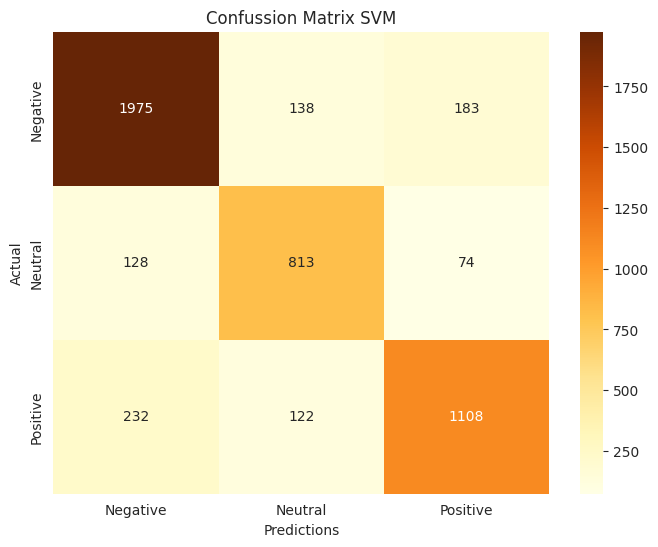

In [44]:
# plot confussion matrix SVM
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'] )
plt.title('Confussion Matrix SVM')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()